# Example cases for each atmospheric feature 

In [4]:
import numpy as np 
from pathlib import Path 
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

import warnings
warnings.filterwarnings("ignore")

### Read in data 

In [5]:
moaap = Path('/glade/campaign/mmm/c3we/prein/Papers/2022_CONUS404-Features/data/V1/CONUS404/')
moaap_ds2020 = xr.open_dataset( moaap / '202001_CONUS404_ObjectMasks__dt-1h_MOAAP-masks.nc')
moaap_ar = moaap_ds2020.AR_Objects 
moaap_tc= moaap_ds2020.TC_Objects
moaap_cy = moaap_ds2020.CY_z500_Objects
lons = moaap_ds2020.lon
lats = moaap_ds2020.lat 


data2d = Path('/glade/campaign/mmm/c3we/CPTP_kukulies/conus404/processed/')
conus_jan = xr.open_dataset(data2d / 'conus404_202001.nc')
conus_jun = xr.open_dataset(data2d / 'conus404_202006.nc')
conus_jul = xr.open_dataset(data2d / 'conus404_202007.nc')
conus_lats = conus_jan.lats
conus_lons = conus_jan.lons

In [53]:
# get feature stats and mask from convection tracking 
tobac = Path('/glade/work/kukulies/pe_conus404/tracked_storms/')
tobac = Path('/glade/campaign/mmm/c3we/CPTP_kukulies/conus404/tracked_storms/')
tobac_mask = xr.open_dataset(tobac / 'tobac_storm_mask_2020_06.nc').segmentation_mask
tobac_tracks = xr.open_dataset(tobac / 'tobac_storm_tracks_2020_06.nc').to_dataframe()
tobac_lons = tobac_mask.lon
tobac_lats = tobac_mask.lat

In [54]:
# select the largest detected MCSs
tobac_mcs = tobac_tracks[ tobac_tracks.mcs_flag == True]
feature= tobac_mcs[ tobac_mcs.area == tobac_mcs.area.max()]
tt = feature.time.values
feature_id = feature.feature.values
track_id = feature.track.values[0]
large_track = tobac_mcs[ tobac_mcs.track == track_id] 

# select the most longlived MCS
lifetimes_per_track = tobac_mcs.groupby('track').count()
track_id = lifetimes_per_track[lifetimes_per_track.frame  == lifetimes_per_track.frame.max()].index.values[0]
long_track = tobac_mcs[tobac_mcs.track == track_id]

# select the most intense MCS
feature= tobac_mcs[ tobac_mcs.feature_min_tb == tobac_mcs.feature_min_tb.min()]
track_id = feature.track.values[0]
intense_track = tobac_mcs[ tobac_mcs.track == track_id]

In [161]:
np.nanmean(intense_track.total_precip/ (intense_track.total_con* 3600))

0.6489540036165067

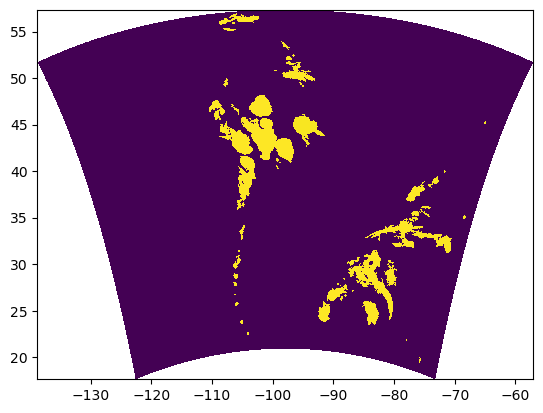

In [58]:
frame = 143 # 507, 1 - 10
tt_mcs = tobac_mask.time.values[frame]
#data = tobac_mask.sel(time = tt).squeeze().data 
#data[data != feature_id] = 0 
data  =  tobac_mask.data[frame] 

plt.pcolormesh(tobac_lons, tobac_lats, data)
plt.show()

In [27]:
tobac_mask

<xarray.DataArray 'segmentation_mask' (time: 720, south_north: 1015,
                                       west_east: 1367)>
[999003600 values with dtype=int32]
Coordinates:
  * time         (time) datetime64[ns] 2020-06-01 ... 2020-06-30T23:00:00
  * south_north  (south_north) int64 0 1 2 3 4 5 ... 1010 1011 1012 1013 1014
  * west_east    (west_east) int64 0 1 2 3 4 5 ... 1361 1362 1363 1364 1365 1366
    lat          (south_north, west_east) float32 ...
    lon          (south_north, west_east) float32 ...
Attributes:
    long_name:  segmentation_mask

In [166]:
# get feature statistics to help select case
feature_stats_cy = xr.open_dataset(Path('/glade/work/kukulies/pe_conus404/moaap_features/CY/features_CY_z500_2020_01.nc')).to_dataframe()
feature_stats_ar = xr.open_dataset(Path('/glade/work/kukulies/pe_conus404/moaap_features/AR/features_AR_2020_01.nc')).to_dataframe()
feature_stats_tc = xr.open_dataset(Path('/glade/work/kukulies/pe_conus404/moaap_features/TC/features_TC_2020_07.nc')).to_dataframe()

In [170]:
cy= feature_stats_cy[feature_stats_cy.feature == 43]
np.nanmean(cy.total_precip / (cy.total_con * 3600))

0.588492901332541

In [171]:
ar =  feature_stats_ar[feature_stats_ar.feature == 216]
np.nanmean(ar.total_precip / (ar.total_con * 3600))

0.5456622021127581

In [174]:
tc =  feature_stats_tc[feature_stats_tc.feature == 116]
np.nanmean(tc.total_precip / (tc.total_con * 3600))

0.6829686643239642

In [56]:
feature_stats_tc[feature_stats_tc.area == feature_stats_tc.area.max()]

,feature,time,lon,lat,area,min_tracking_var,max_tracking_var,mean_tracking_var,max_precip,max_con,max_iwp,max_lwp,total_precip,total_con,total_iwp,total_lwp,min_tb
index,,,,,,,,,,,,,,,,,
41,116,2020-07-25 10:00:00,-95.0,27.0,107968.0,9.880583e+06,1.004119e+07,1.000451e+07,122.09362,0.10839,30.701086,63.503822,62200.640625,24.798901,29886.208984,16542.005859,191.804642


In [171]:
feature_stats_cy[feature_stats_cy.feature == 43].head()

,feature,time,lon,lat,area,min_tracking_var,max_tracking_var,mean_tracking_var,max_precip,max_con,max_iwp,max_lwp,total_precip,total_con,total_iwp,total_lwp,min_tb
index,,,,,,,,,,,,,,,,,
4268,43,2020-01-10 15:00:00,-107.50,33.25,850496.0,53680.274825,55308.643816,54263.280471,4.182442,0.007830,4.797335,3.756594,1708.081421,1.166327,1881.622559,994.802063,244.489838
4269,43,2020-01-10 16:00:00,-107.25,33.00,797440.0,53816.932685,55303.121780,54311.922518,4.595032,0.006303,5.503250,2.934940,1581.604614,0.997737,1558.914551,875.560669,240.566284
4270,43,2020-01-10 17:00:00,-106.75,32.75,761776.0,53915.273139,55265.855520,54351.620094,3.977194,0.005855,3.381787,2.460870,903.769958,0.854498,1770.440552,729.158447,240.673813
4271,43,2020-01-10 18:00:00,-106.25,32.50,727136.0,53993.349067,55304.836602,54383.974583,2.392970,0.006664,4.497422,2.484053,593.795105,0.888521,2089.370605,671.601990,239.721634
4272,43,2020-01-10 19:00:00,-105.75,32.50,759088.0,53985.547632,55277.271790,54372.808191,1.996258,0.004572,5.338315,2.207513,766.245483,0.916209,2375.562500,709.293762,239.961578


### Select cases

In [46]:
################################ select timesteps ######################################

### for an extratropical cyclone case 
#month = 1 
#moaap_cy= moaap_cy.sel(time=moaap_cy.time.dt.month.isin([month]))
t_index = 250
tt_cy = moaap_cy.time[t_index] 
moaap_cy_t = moaap_cy.sel(time = tt_cy )
# select only one of the two shown features (the other one looks like jet stream disturbances)
moaap_cy_t = moaap_cy_t.where(moaap_cy_t == 43, 0 )

### an atmospheric river 
t_index = 80
tt_ar = moaap_ar.time[t_index] 
moaap_ar_t = moaap_ar.sel(time = tt_ar)

### a tropical cyclone 
t_index = 582
month = 7 
moaap_tc= moaap_tc.sel(time=moaap_tc.time.dt.month.isin([month]))
tt_tc = moaap_tc.time[t_index] 
moaap_tc_t = moaap_tc.sel(time = tt_tc)

In [61]:
################################ select same timesteps for CONUS data ########################################## 


precip_tc = conus_jul.sel(time = tt_tc).surface_precip
condensation_tc = conus_jul.sel(time = tt_tc).condensation_rate
iwp_tc = conus_jul.sel(time = tt_tc).tiwp

precip_ar = conus_jan.sel(time = tt_ar).surface_precip
condensation_ar = conus_jan.sel(time = tt_ar).condensation_rate
iwp_ar = conus_jan.sel(time = tt_ar).tiwp

precip_cy = conus_jan.sel(time = tt_cy).surface_precip
condensation_cy = conus_jan.sel(time = tt_cy).condensation_rate
iwp_cy = conus_jan.sel(time = tt_cy).tiwp

precip_mcs = conus_jun.sel(time = tt_mcs).surface_precip
condensation_mcs = conus_jun.sel(time = tt_mcs).condensation_rate
iwp_mcs = conus_jun.sel(time = tt_mcs).tiwp 

times = [ str(precip_ar.time.values)[0:-10], str(precip_cy.time.values)[0:-10], str(precip_tc.time.values)[0:-10], str(precip_mcs.time.values)[0:-10] ]
print(times)

['2020-01-04T08:00:00', '2020-01-11T10:00:00', '2020-07-25T06:00:00', '2020-06-06T23:00:00']


In [165]:
print(np.unique(moaap_ar_t))

[  0. 216.]


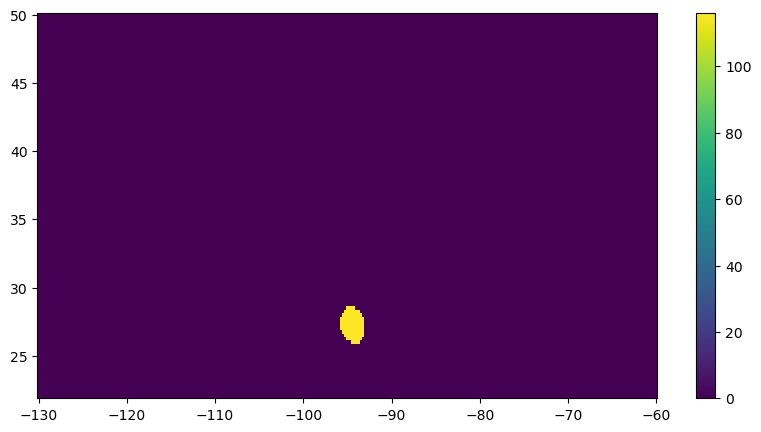

In [182]:
plt.figure(figsize=(10, 5 ))
plt.pcolormesh(lons, lats, moaap_tc_t)
plt.colorbar()
plt.show()

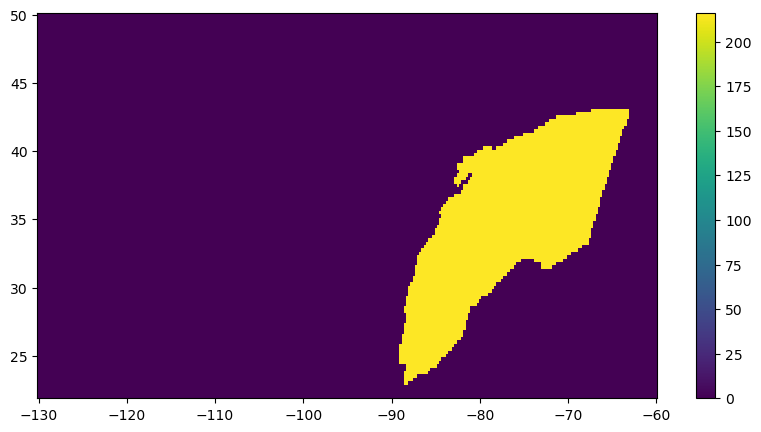

In [177]:
plt.figure(figsize=(10, 5 ))
plt.pcolormesh(lons, lats, moaap_ar_t)
plt.colorbar()
plt.show()

### Plot surface precip, condensation rate and ice water path for figure contour 

In [20]:
savedir = Path('/glade/work/kukulies/pe_conus404/conus404/notebooks/figures/')

In [28]:
import cmocean

# draw filled contours.
clevs = [0, 0.001, 0.01,  0.1, 0.2, 0.3, 0.4, 0.5, 0.8,  1, 2, 3, 5, 7, 10, 15, 20, 30, 40,
         50, 80]


# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap_pr = colors.ListedColormap(cmap_data, 'precipitation')
norm_pr = colors.BoundaryNorm(clevs, cmap_pr.N)

cmap_iwp = cmocean.cm.ice
cmap_con = cmocean.cm.matter
norm_ice= LogNorm(1e-5,1e1)
norm_con =  LogNorm(1e-3,1e1)

In [109]:
# all data in one matrix with cols being the variables and rows the atmospheric features 
data = np.array([precip_ar, precip_cy, precip_tc, precip_mcs ])
data = np.stack( [data, np.array([condensation_ar*3600, condensation_cy*3600, condensation_tc*3600, condensation_mcs*3600]), np.array([iwp_ar, iwp_cy, iwp_tc, iwp_mcs])  ],  axis = 0 )

# feature masks 
masks = [moaap_ar_t, moaap_cy_t, moaap_tc_t, tobac_mask[frame]]
print(data.shape)

(3, 4, 1015, 1367)


In [32]:
print(savedir)

/glade/work/kukulies/pe_conus404/conus404/notebooks/figures


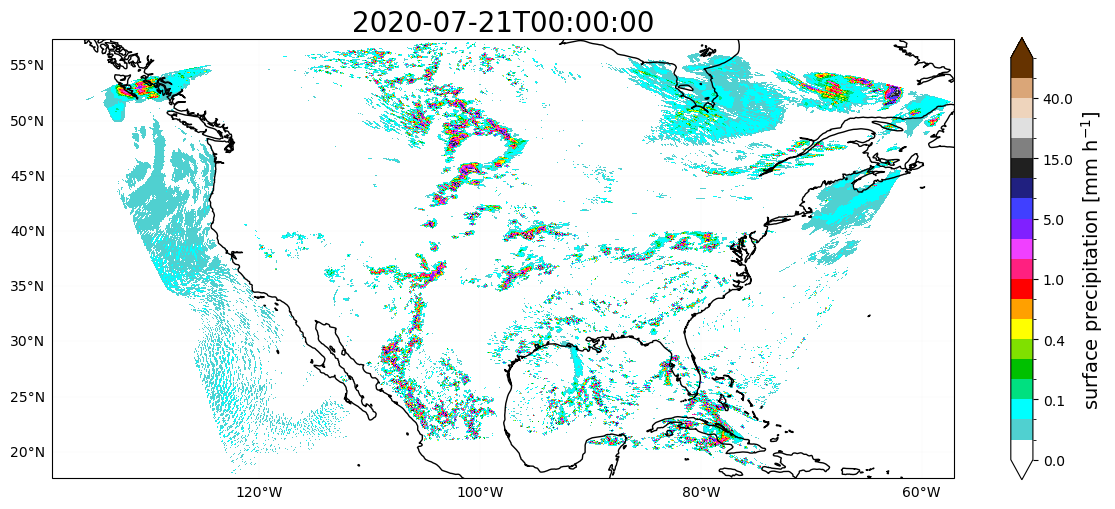

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

rows  = 4
cols  = 3
fs    = 17
size  = 14 


# Create a figure
fig = plt.figure(figsize=(12, 5))
labels = ['surface precipitation [mm h$^{-1}$]']
cmaps = [cmap_pr]
norms = [norm_pr]
# select one time snapshot 
tt = 480
precip = conus_jul.surface_precip[:,:,tt]

# Create axes for subplots and colorbars
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
img = ax.pcolormesh(conus_lons, conus_lats,precip, transform=ccrs.PlateCarree(), cmap=cmaps[0], norm = norms[0], shading='auto')
ax.set_title(str(precip.time.values)[:-10], fontsize = 20 )

ax.coastlines()
# axis labels  
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.05, color='gray', alpha=0.5, linestyle='--') 

gl.top_labels = False
gl.right_labels = False

cbar = plt.colorbar(img,orientation='vertical', extend = 'both')
cbar.set_label(labels[0], size = size)

# Adjust layout
plt.tight_layout()

# Save figure output
plt.savefig(savedir / 'example_surface_precipitation_C404.png', bbox_inches = 'tight')

# display the plot
plt.show()

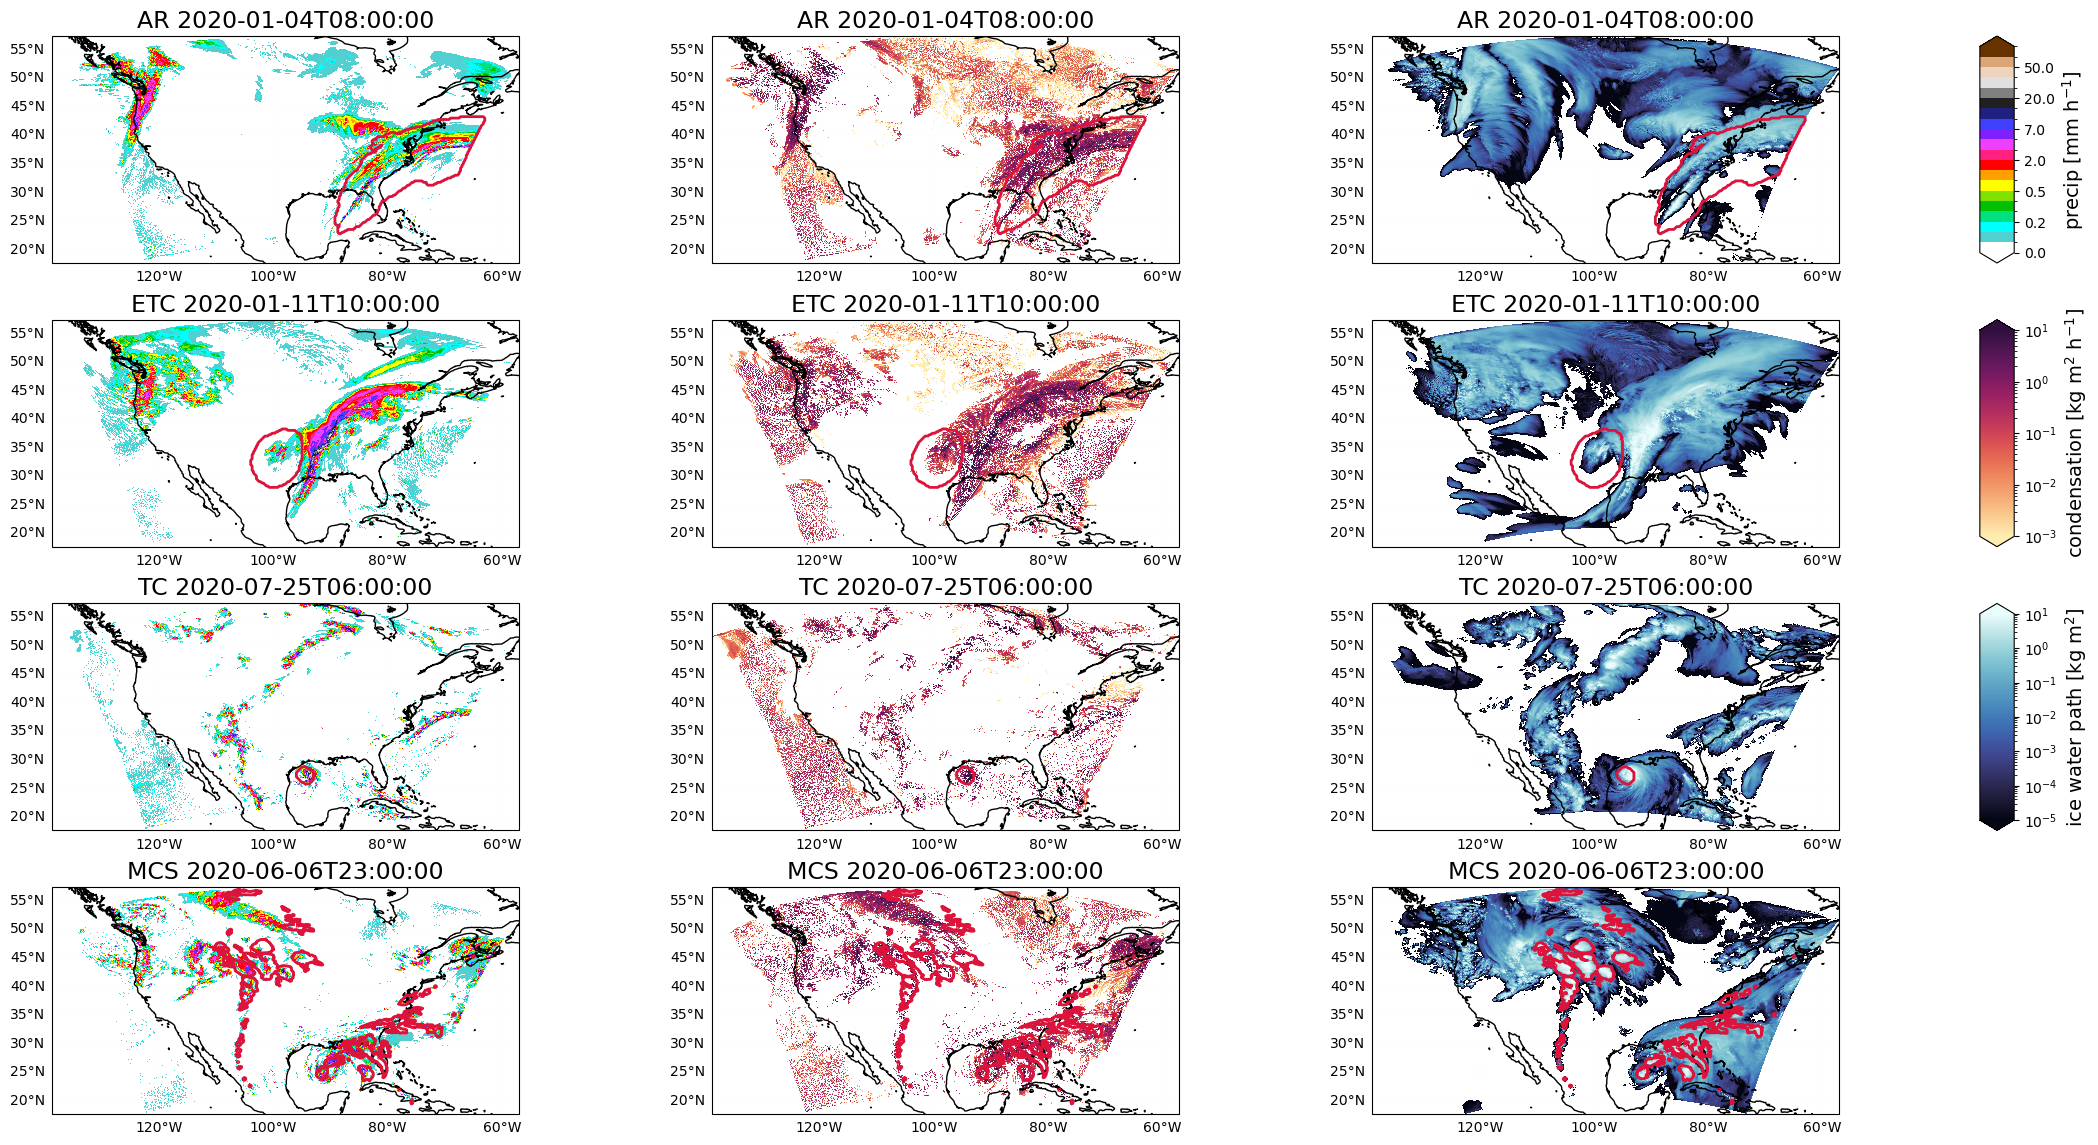

In [151]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

rows  = 4
cols  = 3
fs    = 17
size  = 14 

# Create a figure
fig = plt.figure(figsize=(26, 14))
labels = ['precip [mm h$^{-1}$]', 'condensation [kg m$^2$ h$^{-1}$]', 'ice water path [kg m$^2$]']
features = ['AR', 'ETC', 'TC', 'MCS']
cmaps = [cmap_pr, cmap_con, cmap_iwp]
norms = [norm_pr, norm_con, norm_ice]
ims = [[]] * 3

# contour color 
contour = 'crimson'

# Create a GridSpec layout
gs = gridspec.GridSpec(rows, cols+ 1 , width_ratios=[1, 1, 1,   0.06], wspace = 0.2, hspace = 0.25)

# Create axes for subplots and colorbars
axes = [fig.add_subplot(gs[i, j], projection=ccrs.PlateCarree()) for i in range(rows) for j in range(cols)]
colorbar_axes = [fig.add_subplot(gs[i, cols]) for i in range(rows)] 
colorbar_axes[-1].set_visible(False)

# Plot data and add colorbars
for i in range(rows):
    for j in range(cols):
        ax = axes[i * 3 + j]
            
        ims[j] = ax.pcolormesh(conus_lons, conus_lats, data[j,i], transform=ccrs.PlateCarree(), cmap=cmaps[j], norm = norms[j], shading='auto')

        #ax.pcolormesh(conus_lons, conus_lats, data[j,i], transform=ccrs.PlateCarree(), cmap=cmaps[j], norm = norms[j], shading='auto')
        mask = masks[i]
        ax.contour(mask.lon, mask.lat, mask, linewidths = [2.], colors = contour, levels = [1])
        ax.coastlines()
        ax.set_title(f"{features[i]} {times[i]}", fontsize = fs )

        # axis labels  
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.02, color='gray', alpha=0.5, linestyle='--') 

        gl.top_labels = False
        gl.right_labels = False


# loop through colorbars 
for x in range(3):
    cbar = plt.colorbar(ims[x], cax=colorbar_axes[x], orientation='vertical', extend = 'both')
    cbar.set_label(labels[x], size = size)

# Adjust layout
plt.tight_layout()

# Save figure output 
plt.savefig(savedir / 'example_features.png', bbox_inches = 'tight')

# display the plot
plt.show()

### TODO 

- find better timesteps/ example cases
- add smaller-scale convection